In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

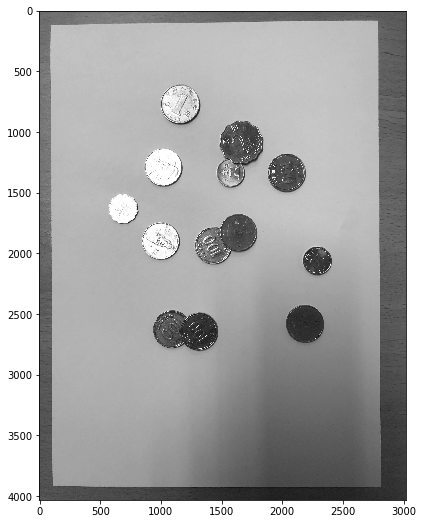

In [140]:
image = 'coins_set3.jpg'
img = cv2.imread(image, 1)
img_orig = img.copy()
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(img,cmap='gray')

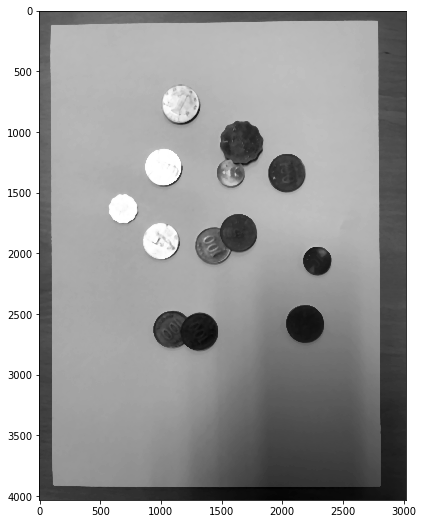

In [141]:
img = cv2.medianBlur(img,19)
plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(img,cmap='gray')

In [142]:
all_circs = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 0.9, 120, param1 = 50, param2 = 30, minRadius = 105, maxRadius = 280)
all_circs_rounded = np.uint16(np.around(all_circs))

print(all_circs_rounded)
print(all_circs_rounded.shape)
print('I have found ' + str(all_circs_rounded.shape[1]) + ' coins.')

[[[1160  772  157]
  [2188 2586  161]
  [1644 1830  152]
  [2294 2066  119]
  [1018 1294  156]
  [2042 1342  158]
  [1004 1900  148]
  [1322 2646  156]
  [1440 1940  155]
  [1572 1338  110]
  [1104 2630  157]
  [1684 1122  153]
  [ 694 1656  116]]]
(1, 13, 3)
I have found 13 coins.


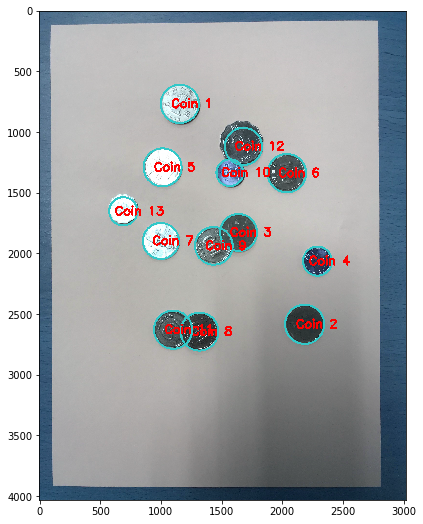

In [143]:
count = 1
for i in all_circs_rounded[0, :]:
    cv2.circle(img_orig, (i[0],i[1]),i[2],(50, 200, 200), 15)
    cv2.circle(img_orig, (i[0],i[1]),2,(255, 0, 0), 5)
    cv2.putText(img_orig, "Coin " + str(count), (i[0]-70,i[1]+30), cv2.FONT_HERSHEY_SIMPLEX, 3.3, (255,0,0), 15)
    count += 1
    
    plt.rcParams["figure.figsize"] = (16,9)
    plt.imshow(img_orig)